In [1]:
# Modified from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
a, c = (5, 1)
def f(x):
    phi = np.array([np.sin(a*x[0]), np.sin(a*c*x[1]), 2*x[0], 2*c*x[1]])
    return phi.T@phi

<IPython.core.display.Javascript object>


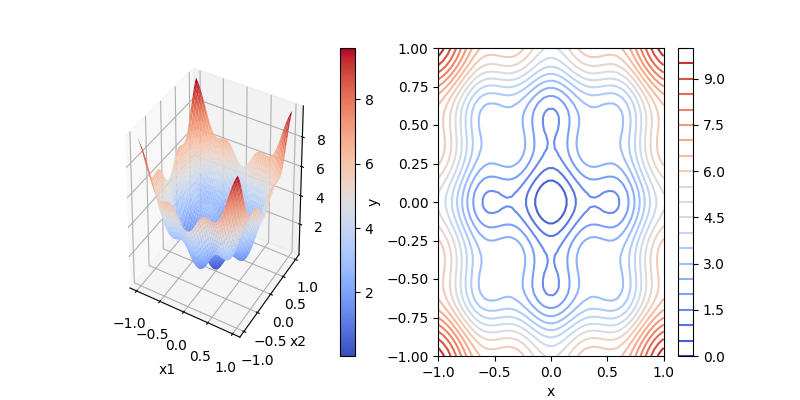

In [3]:
# visualize the real function, f
%matplotlib notebook
%matplotlib notebook

nx1, nx2 = (50, 50)
x1 = np.linspace(-1, 1, nx1)
x2 = np.linspace(-1, 1, nx2)
x1v, x2v = np.meshgrid(x1, x2)

fx_s = np.zeros_like(x1v)
for i in range(nx1):
    for j in range(nx2):
        x = np.array([x1[i], x2[j]])
        fx_s[i,j] = f(x)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection="3d")
surf = ax1.plot_surface(x1v,x2v,fx_s,cmap=cm.coolwarm)
fig.colorbar(surf)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f')
ax2 = fig.add_subplot(122)
surf2 = plt.contour(x1v,x2v,fx_s,levels=20,cmap=cm.coolwarm)
fig.colorbar(surf2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [7]:
# Observations
N = 100
X = np.zeros((N,2))
y = np.zeros(N)
for i in range(N):
    x = np.random.rand(2)*2-1 # uniformly sample from [-1,1]^2
    X[i,:] = x
    y[i] = f(x)

# Instantiate a Gaussian Process model
kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=10), n_restarts_optimizer=9,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

<IPython.core.display.Javascript object>


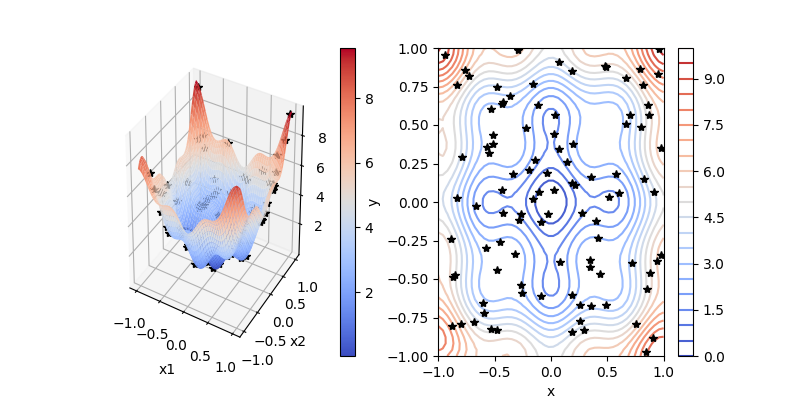

In [8]:
# visualize the GP prediction - test it with different N
X_q = np.stack([x1v.reshape(-1), x2v.reshape(-1)], axis=1)
y_pred, sigma = gp.predict(X_q, return_std=True)
y_pred = y_pred.reshape(nx1,nx2)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection="3d")
surf = ax1.plot_surface(x1v,x2v,y_pred,cmap=cm.coolwarm)
ax1.plot(X[:,0], X[:,1], y, 'k*')
fig.colorbar(surf)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f')
ax2 = fig.add_subplot(122)
surf2 = plt.contour(x1v,x2v,y_pred,levels=20,cmap=cm.coolwarm)
ax2.plot(X[:,0], X[:,1], 'k*')
fig.colorbar(surf2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()